covolution:
1. applying a sliding window function
2. the function is specified in a kernel
3. the weights of kernel are determined during training
4. a kernel extracs features from the underlying image

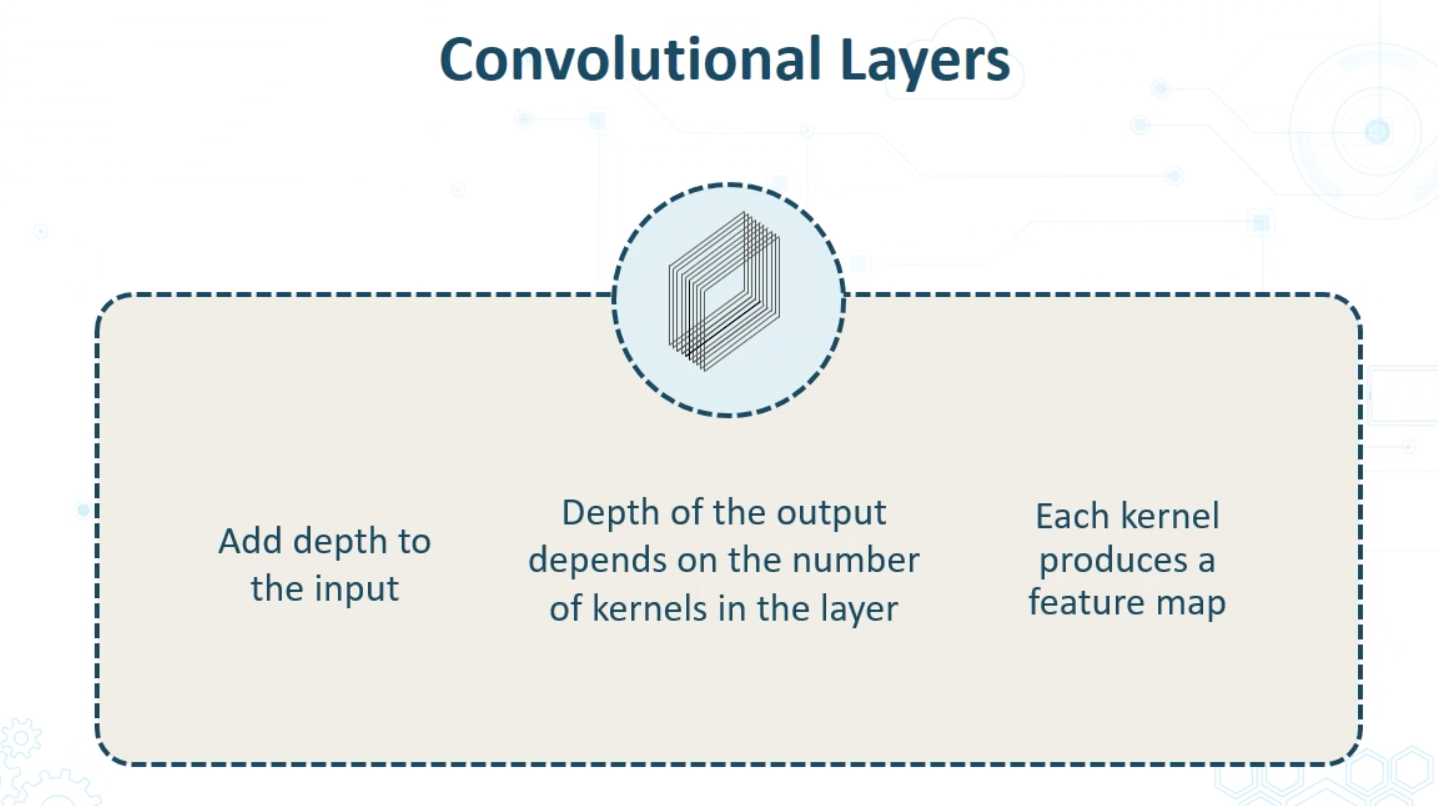

Image as an input matrix




In [5]:
import math
import numpy as np
import tensorflow as tf
import skimage.io
import matplotlib.pyplot as pplt
%matplotlib inline

/Users/sijia.li/py3_kernel/lib/python3.7/site-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 7.1.0. Several security issues (CVE-2020-11538, CVE-2020-10379, CVE-2020-10994, CVE-2020-10177) have been fixed in pillow 7.1.0 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


In [4]:
!source ~/py3_kernel/bin/activate && python -V && pip install scikit-image

Python 3.7.0b4
     |████████████████████████████████| 12.7MB 5.6MB/s eta 0:00:01    |██████████████████████          | 8.8MB 5.6MB/s eta 0:00:01     |█████████████████████████       | 10.0MB 5.6MB/s eta 0:00:01
     |████████████████████████████████| 3.3MB 16.8MB/s eta 0:00:01
     |████████████████████████████████| 16.0MB 11.7MB/s eta 0:00:01     |██████████████████████▎         | 11.1MB 15.7MB/s eta 0:00:01     |████████████████████████████▌   | 14.2MB 11.7MB/s eta 0:00:01     |█████████████████████████████   | 14.5MB 11.7MB/s eta 0:00:01
     |████████████████████████████████| 4.3MB 14.8MB/s eta 0:00:01     |██████▊                         | 911kB 14.8MB/s eta 0:00:01     |██████████████████████▍         | 3.0MB 14.8MB/s eta 0:00:01
     |████████████████████████████████| 1.6MB 11.8MB/s eta 0:00:01
     |████████████████████████████████| 174kB 12.1MB/s eta 0:00:01
ERROR: tensorflow 2.3.1 has requirement numpy<1.19.0,>=1.16.0, but you'll have numpy 1.20.3 which is incompatible.
  Fo

In [6]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


(512, 512)


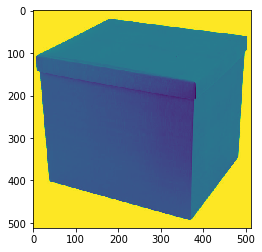

In [8]:
# import image as an input matrix

image = skimage.io.imread('box.jpeg',as_gray=True)
pplt.imshow(image)
print(image.shape)
# single channel image - the last dimension is only the intensity value

In [9]:
image

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [10]:
tf.reset_default_graph()

In [12]:
kernel = np.array([3,3])
kernel = [[-1,-1,-1],
          [2,2,2],
         [-1,-1,-1]]
# horizontal edge detection -  the middle row are positive and first and last are negative - this enhances the edge


In [13]:
# input layer - batch size, height, width, number_channels
# NHWC format - images are 4d sensors
input_shape = (1, image.shape[0], image.shape[1],1) 
# 1 - batch size - 1 image
#  image.shape[0] - height
# image.shape[1] - width
#  1 - number of channel

input_placeholder = tf.placeholder(dtype = tf.float32, shape = input_shape)

In [14]:
with tf.name_scope('convolution'):
    conv_w = tf.constant(kernel, dtype = tf.float32, shape = (3,3,1,1))
#     3,3,1,1 - 3,3, the kernel shape; 1-number of kernel, 1- number of channel
    
    output = tf.nn.conv2d(input = input_placeholder,
                         filter = conv_w,
                         strides= [1,1,1,1],
                         padding = 'SAME')
#     strides is also using NHWC format
    

In [15]:
with tf.Session() as sess:
    result = sess.run(output, feed_dict = {input_placeholder: image[np.newaxis, :,:, np.newaxis]})

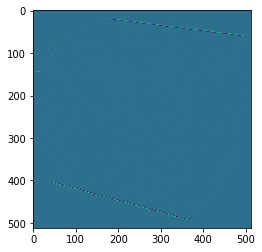

In [16]:
pplt.imshow(result[0,:,:,0])

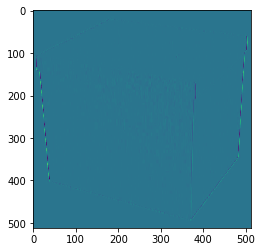

In [17]:
# update the kernel for the verital edge detection
kernal_vertital = np.array([3,3])
kernal_vertital = [[-1,2,-1],
         [-1,2,-1],
         [-1,2,-1]]

with tf.name_scope('convolution'):
    conv_w = tf.constant(kernal_vertital, dtype = tf.float32, shape = (3,3,1,1))
#     3,3,1,1 - 3,3, the kernel shape; 1-number of kernel, 1- number of channel
    
    output = tf.nn.conv2d(input = input_placeholder,
                         filter = conv_w,
                         strides= [1,1,1,1],
                         padding = 'SAME')
#     strides is also using NHWC format
    
with tf.Session() as sess:
    result = sess.run(output, feed_dict = {input_placeholder: image[np.newaxis, :,:, np.newaxis]})
    
pplt.imshow(result[0,:,:,0])



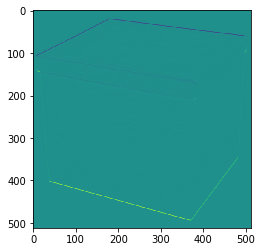

In [19]:
# there is another way - sobel horizontal edge detection
kernal_sobel = np.array([3,3])
kernal_sobel = [[-1,-2,-1],
         [0,0,0],
         [1,2,1]]

with tf.name_scope('convolution'):
    conv_w = tf.constant(kernal_sobel, dtype = tf.float32, shape = (3,3,1,1))
#     3,3,1,1 - 3,3, the kernel shape; 1-number of kernel, 1- number of channel
    
    output = tf.nn.conv2d(input = input_placeholder,
                         filter = conv_w,
                         strides= [1,1,1,1],
                         padding = 'SAME')
#     strides is also using NHWC format
    
with tf.Session() as sess:
    result = sess.run(output, feed_dict = {input_placeholder: image[np.newaxis, :,:, np.newaxis]})
    
pplt.imshow(result[0,:,:,0])



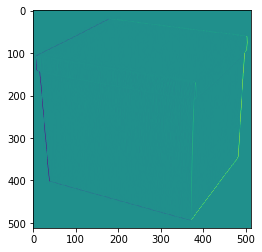

In [20]:
# there is another way - sobel horizontal edge detection
kernal_sobel_verital = np.array([3,3])
kernal_sobel_verital = [[-1,0,1],
         [-2,0,2],
         [-1,0,1]]

with tf.name_scope('convolution'):
    conv_w = tf.constant(kernal_sobel_verital, dtype = tf.float32, shape = (3,3,1,1))
#     3,3,1,1 - 3,3, the kernel shape; 1-number of kernel, 1- number of channel
    
    output = tf.nn.conv2d(input = input_placeholder,
                         filter = conv_w,
                         strides= [1,1,1,1],
                         padding = 'SAME')
#     strides is also using NHWC format
    
with tf.Session() as sess:
    result = sess.run(output, feed_dict = {input_placeholder: image[np.newaxis, :,:, np.newaxis]})
    
pplt.imshow(result[0,:,:,0])



Pooling
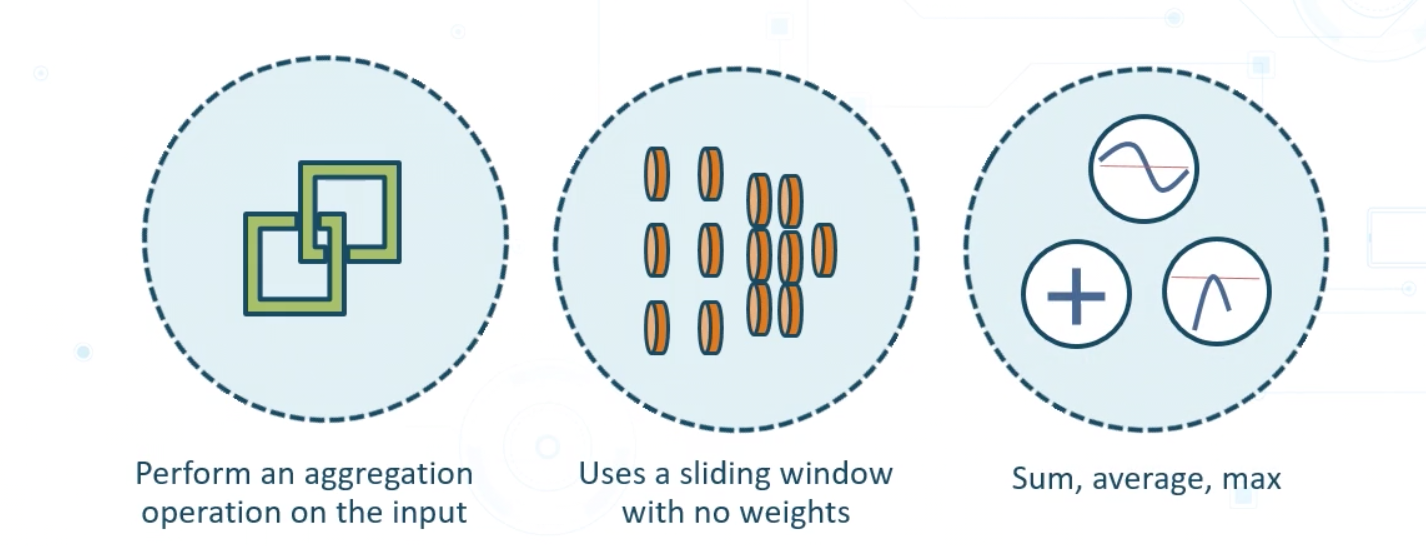


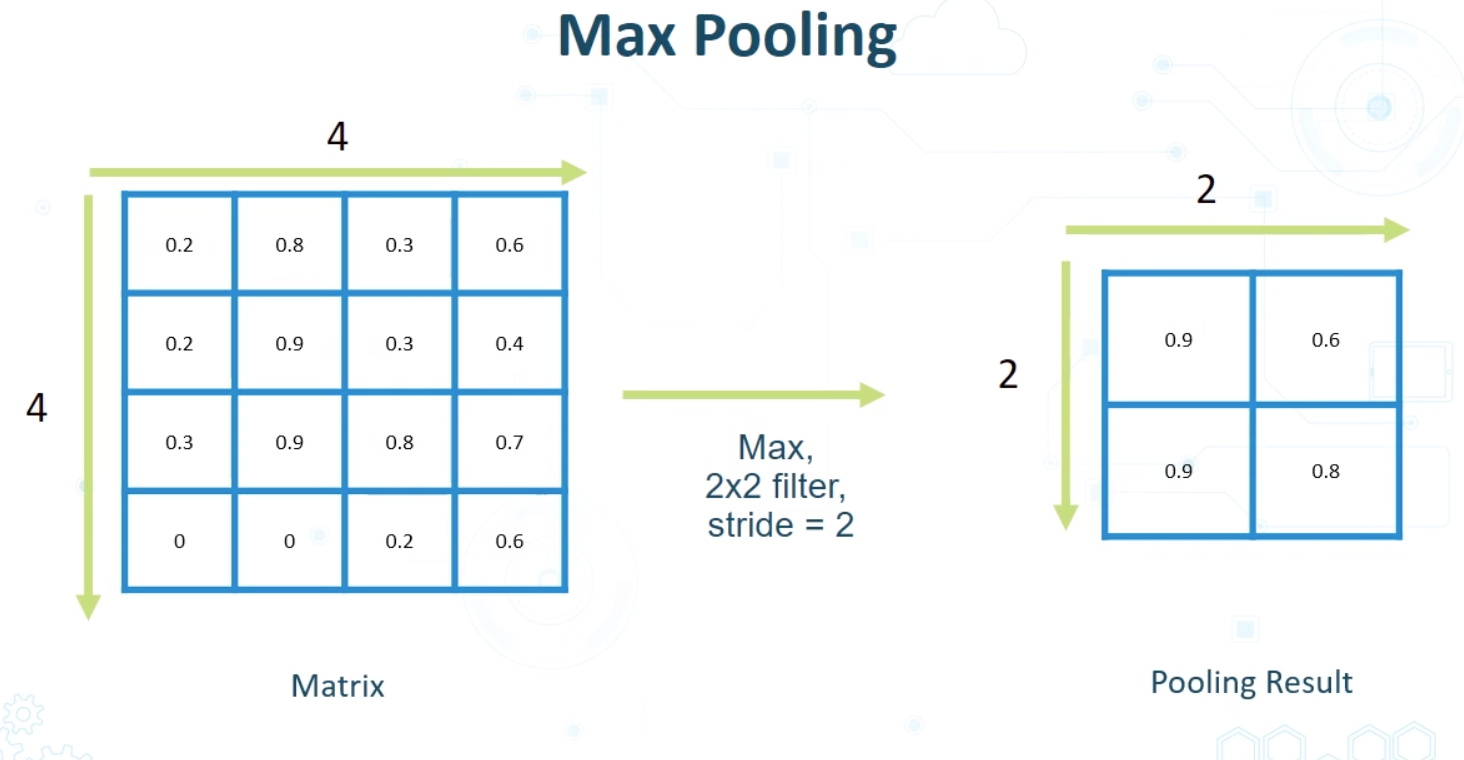

Why pooling is needed?
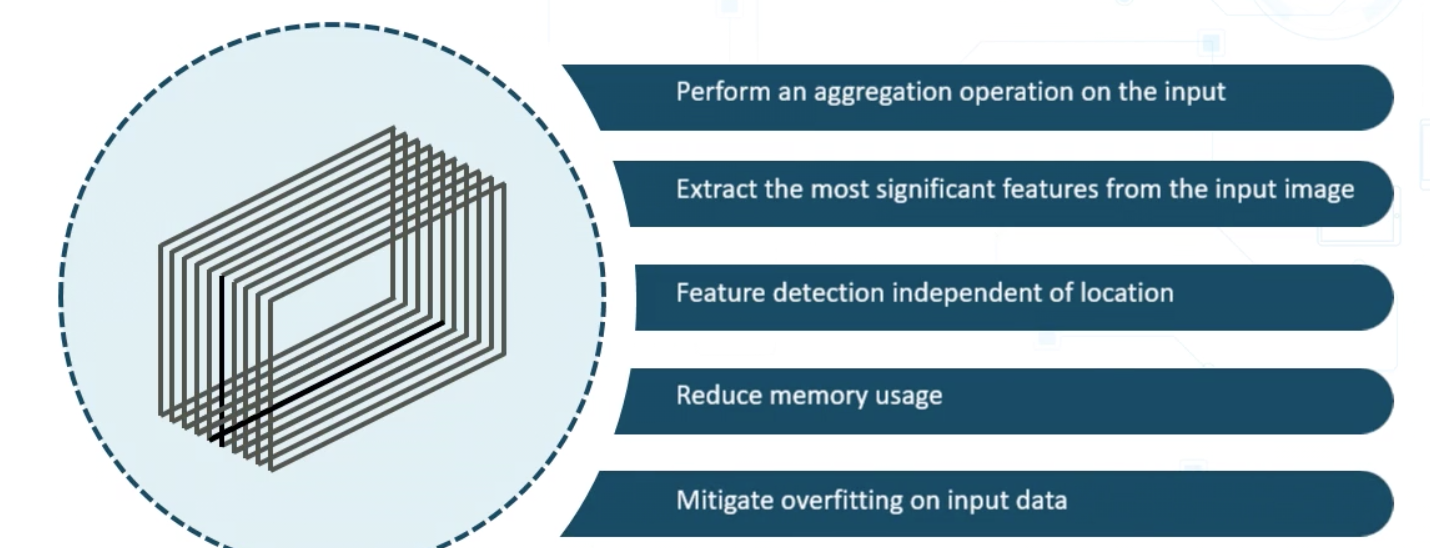

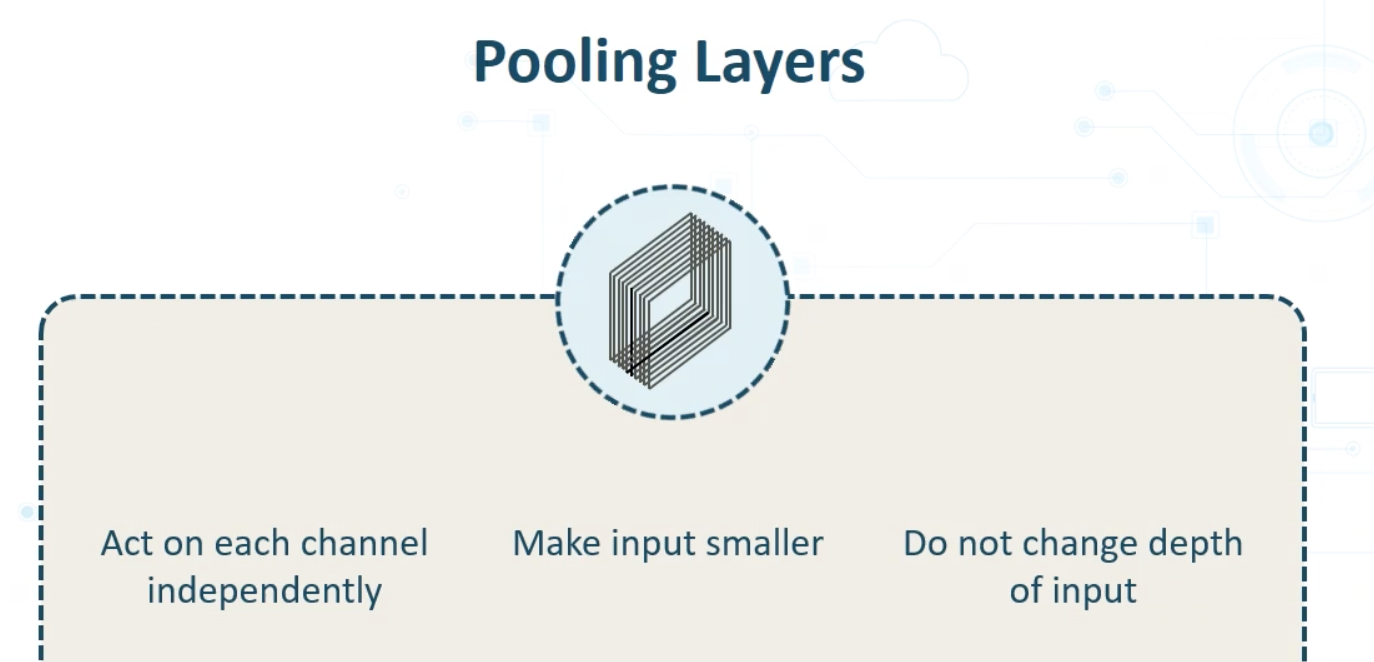

(282, 425)


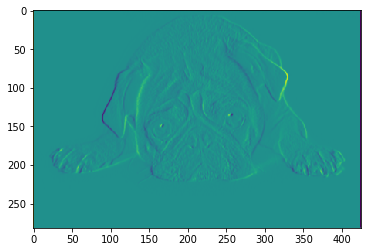

In [22]:
# try animal photo
# dog_grass or dog_nb (no background works much better)

image = skimage.io.imread('dog_nb.jpeg',as_gray=True)
pplt.imshow(image)
print(image.shape)
# single channel image - the last dimension is only the intensity value

# there is another way - sobel horizontal edge detection
kernal_sobel_verital = np.array([3,3])
kernal_sobel_verital = [[-1,0,1],
         [-2,0,2],
         [-1,0,1]]

# input layer - batch size, height, width, number_channels
# NHWC format - images are 4d sensors
input_shape = (1, image.shape[0], image.shape[1],1) 
# 1 - batch size - 1 image
#  image.shape[0] - height
# image.shape[1] - width
#  1 - number of channel

input_placeholder = tf.placeholder(dtype = tf.float32, shape = input_shape)

with tf.name_scope('convolution'):
    conv_w = tf.constant(kernal_sobel_verital, dtype = tf.float32, shape = (3,3,1,1))
#     3,3,1,1 - 3,3, the kernel shape; 1-number of kernel, 1- number of channel
    
    output = tf.nn.conv2d(input = input_placeholder,
                         filter = conv_w,
                         strides= [1,1,1,1],
                         padding = 'SAME')
#     strides is also using NHWC format
    
with tf.Session() as sess:
    result = sess.run(output, feed_dict = {input_placeholder: image[np.newaxis, :,:, np.newaxis]})
    
pplt.imshow(result[0,:,:,0])

